In [8]:
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt
import sexpy
from toolbox.astro import angsep
outdir = '/Users/protostar/local_data/asas-sn-hugs-io/sex/out'
plt.style.use('jpg')
pixscale = 7.8 # arcsec/pix

In [48]:
cat = sexpy.read_cat(os.path.join(outdir, 'sex.cat'))
mask = cat['FLUX_RADIUS']>0
cat = cat[mask]
cat['r_arcmin'] = cat['FLUX_RADIUS']*pixscale/60
ra, dec = 6.5486882, -11.043124
cand_i = angsep(ra, dec, cat['ALPHA_J2000'], cat['DELTA_J2000']).argmin()

In [56]:
cat['fwhm_arcmin'] = cat['FWHM_IMAGE']*pixscale/60

In [52]:
size_cut = cat['r_arcmin']>1.5

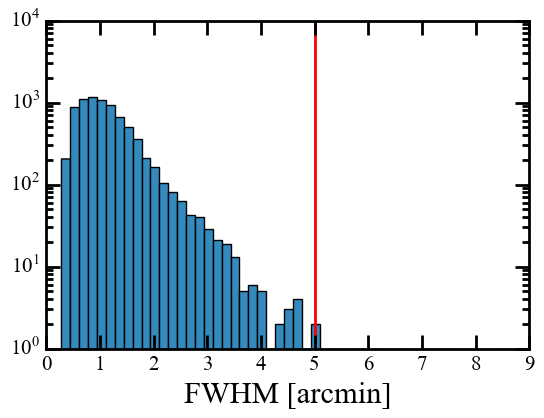

In [71]:
plt.hist(cat['fwhm_arcmin'], bins=50, log=True)
plt.axvline(cat['fwhm_arcmin'][cand_i], c='r', lw=2)
plt.xlabel('FWHM [arcmin]');

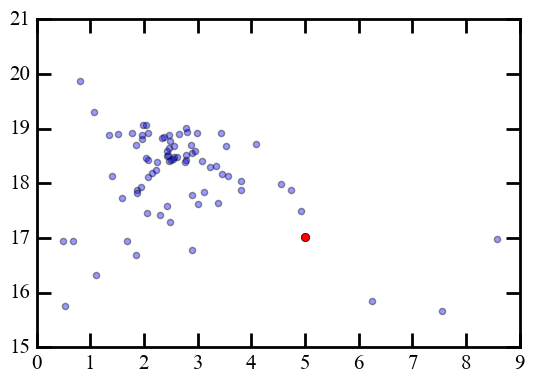

In [75]:
plt.scatter(cat['fwhm_arcmin'][size_cut], cat['MAG_APER_2'][size_cut], alpha=0.4)
plt.plot(cat['fwhm_arcmin'][cand_i], cat['MAG_APER_2'][cand_i], 'ro')

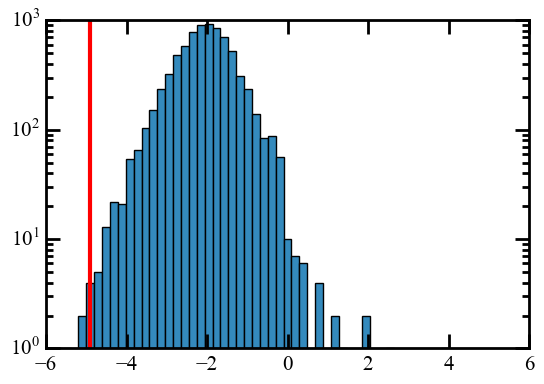

In [73]:
diff = cat['MAG_AUTO'] - cat['MAG_APER_1']
plt.hist(diff, bins=50, log=True)
plt.axvline(diff[cand_i], c='r', lw=3);